In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\Desktop\Muruga\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

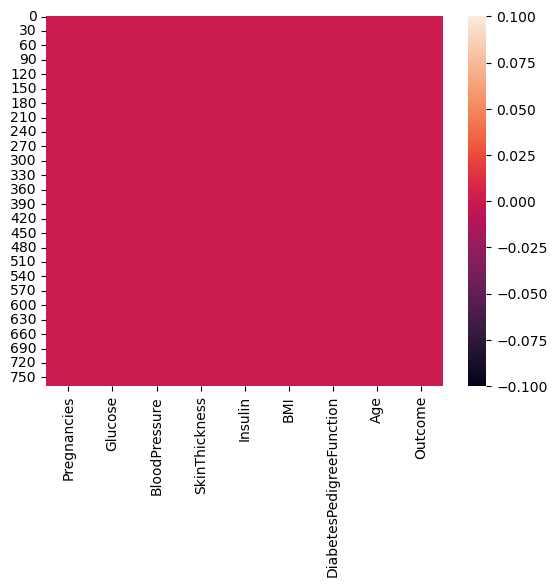

In [8]:
sns.heatmap(data.isnull())

In [9]:
correlation=data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

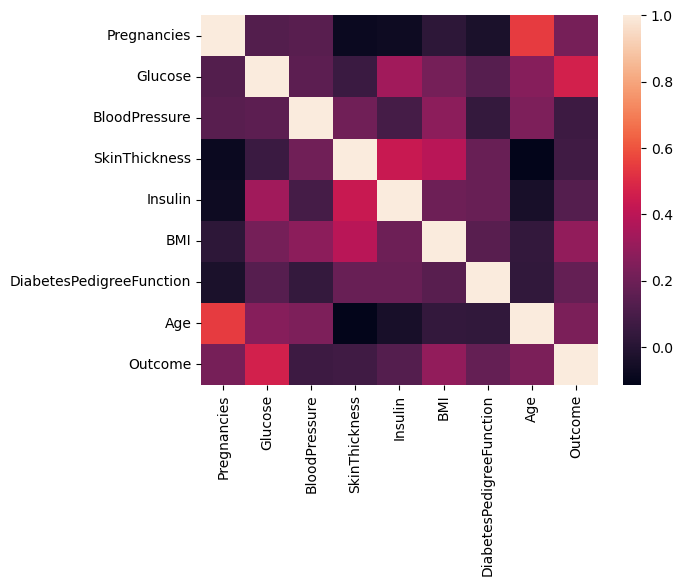

In [10]:
sns.heatmap(correlation)

In [16]:
X=data.drop("Outcome",axis=1)
Y=data['Outcome']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
6,3,78,50,32,88,31.0,0.248,26
596,0,67,76,0,0,45.3,0.194,46
681,0,162,76,36,0,49.6,0.364,26
739,1,102,74,0,0,39.5,0.293,42
385,1,119,54,13,50,22.3,0.205,24
...,...,...,...,...,...,...,...,...
616,6,117,96,0,0,28.7,0.157,30
285,7,136,74,26,135,26.0,0.647,51
523,9,130,70,0,0,34.2,0.652,45
758,1,106,76,0,0,37.5,0.197,26


In [17]:
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
predictions=model.predict(X_test)

In [19]:
print(predictions)

[0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0
 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 1 1 0]


In [20]:
accuracy=accuracy_score(predictions,Y_test)

In [21]:
print(accuracy)

0.7857142857142857


In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

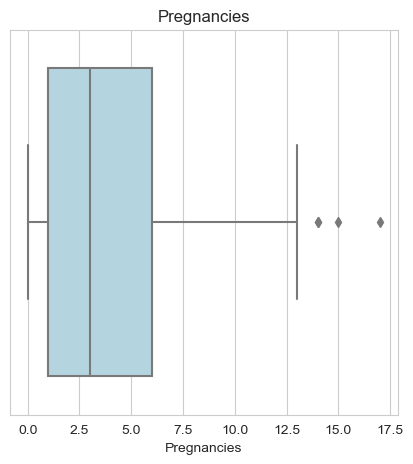

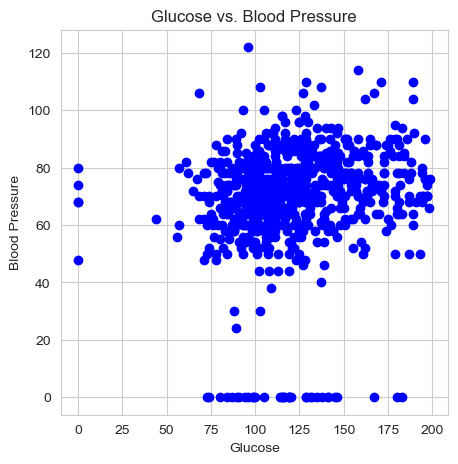

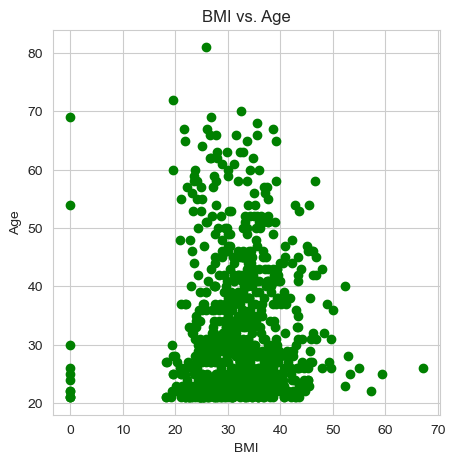

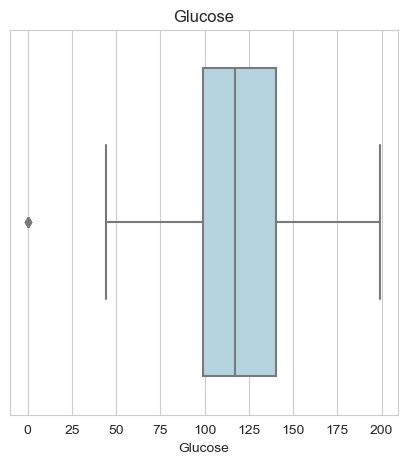

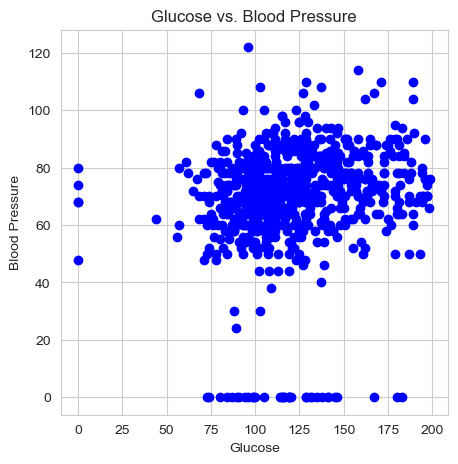

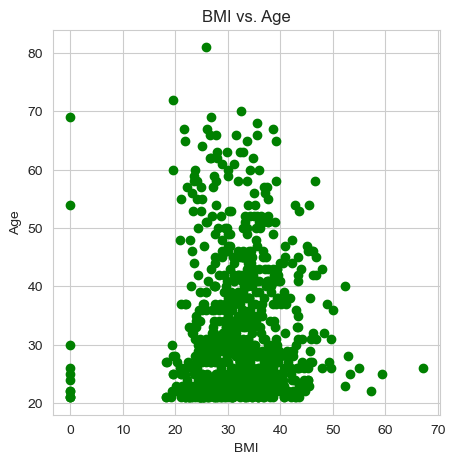

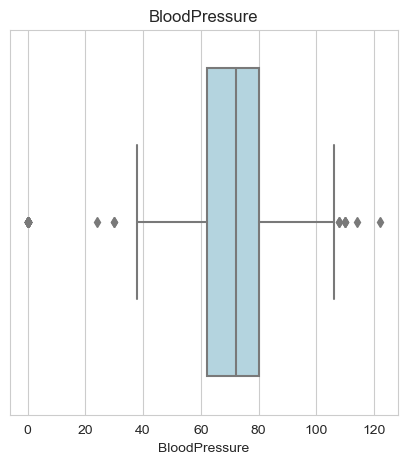

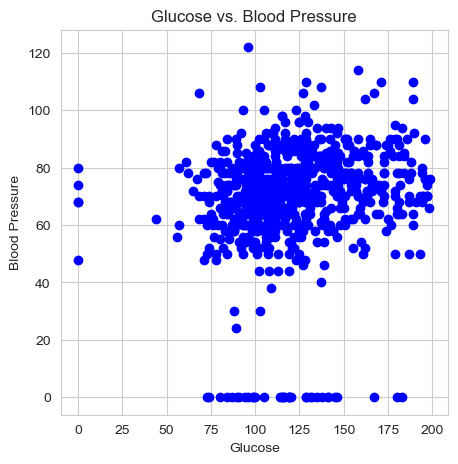

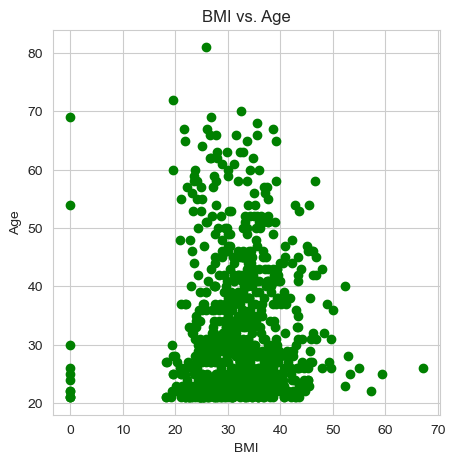

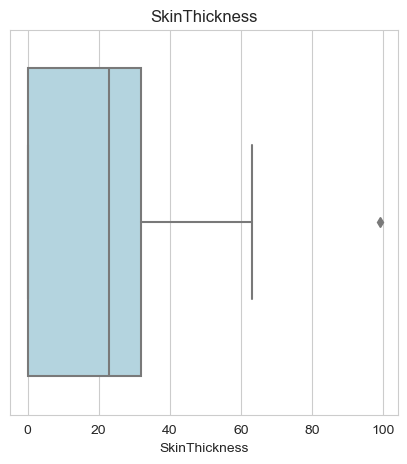

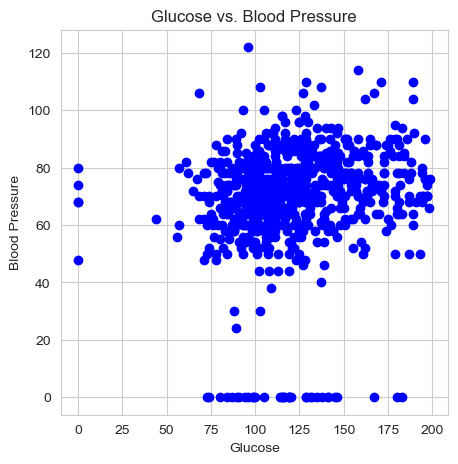

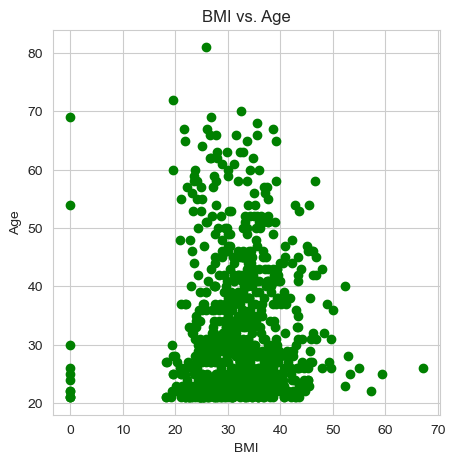

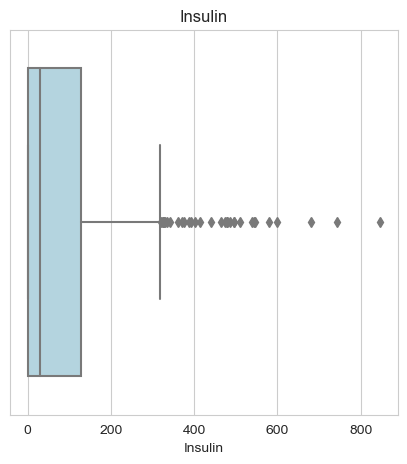

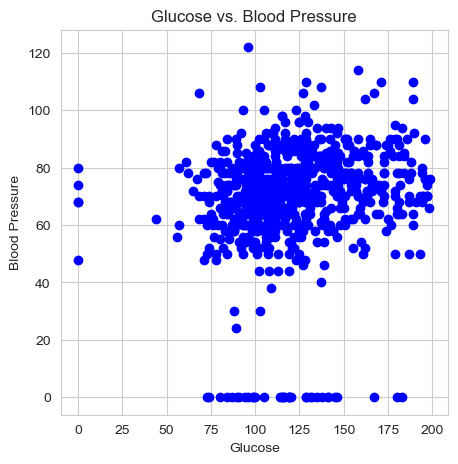

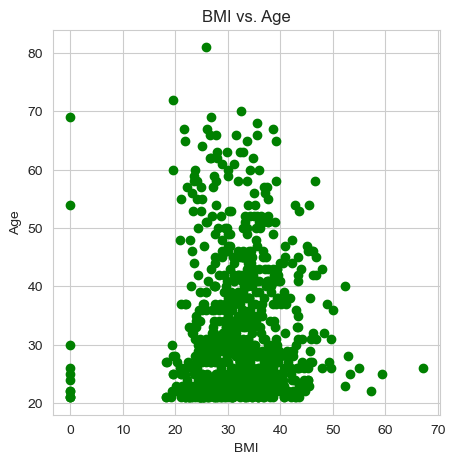

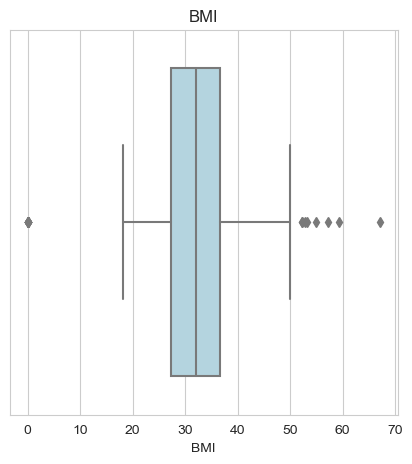

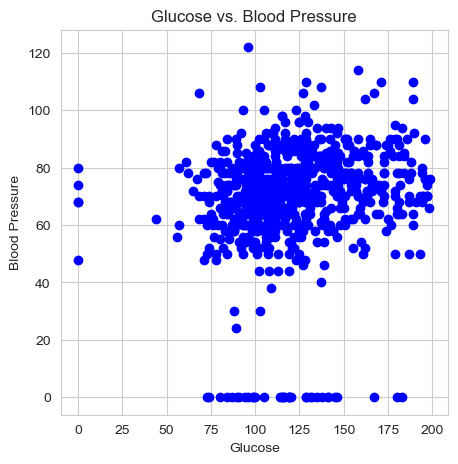

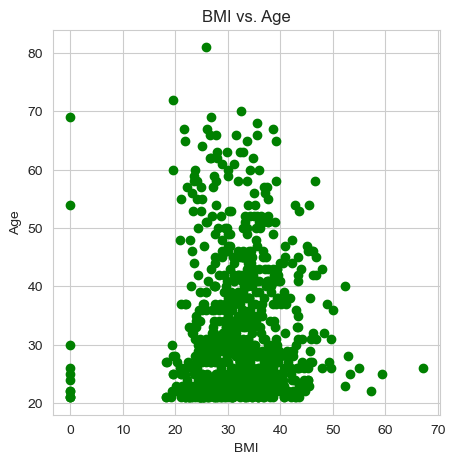

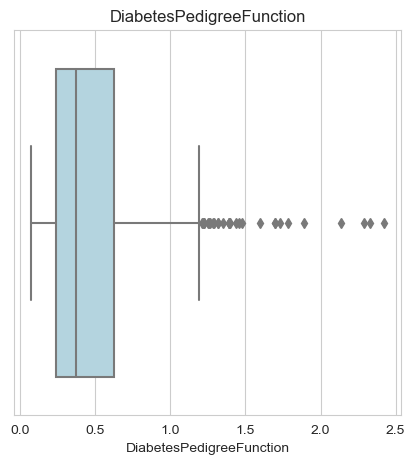

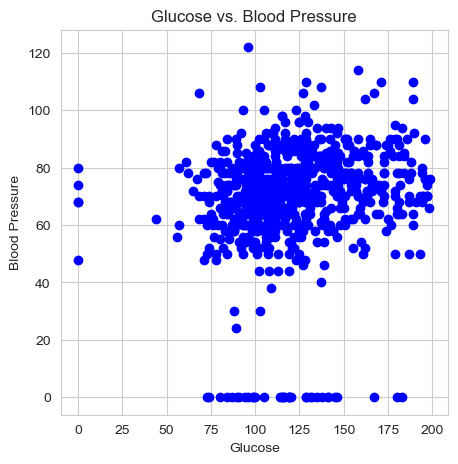

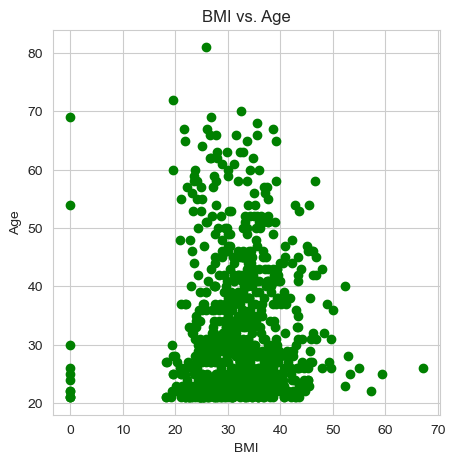

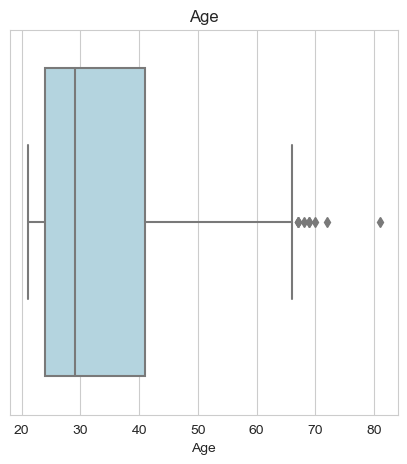

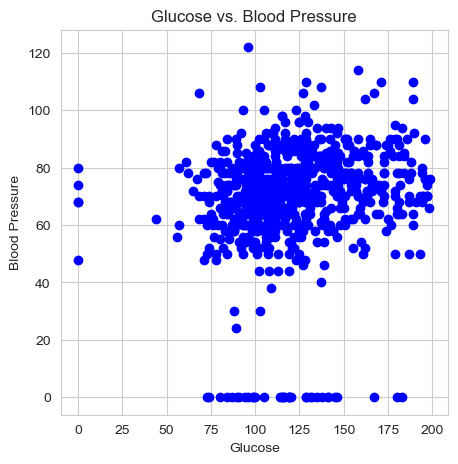

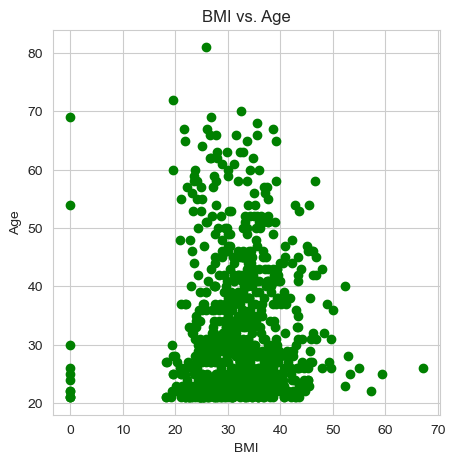

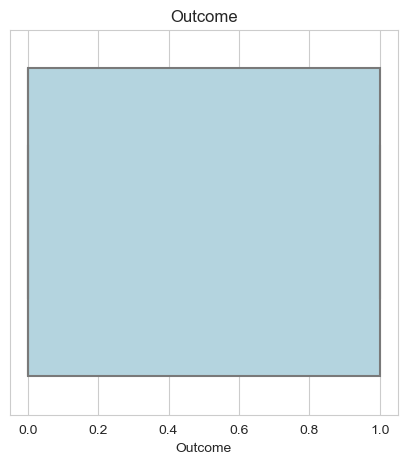

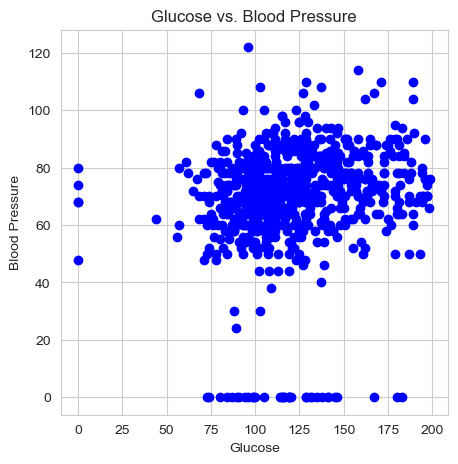

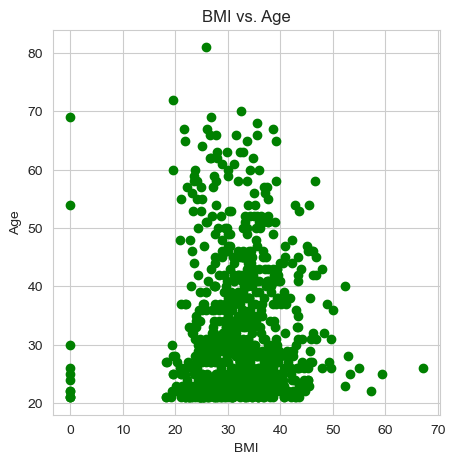

In [32]:
#Box plot for each numerical variable
for i in data.columns:
    if data[i].dtype == 'float64' or data[i].dtype == 'int64':
        plt.figure(figsize=(5,5))
        sns.boxplot(x=data[i], color='lightblue')
        plt.title(i)
        plt.show()

        # Scatter plot for selected variables
        plt.figure(figsize=(5,5))
        plt.scatter(data['Glucose'], data['BloodPressure'], color='blue')
        plt.title("Glucose vs. Blood Pressure")
        plt.xlabel("Glucose")
        plt.ylabel("Blood Pressure")
        plt.show()

        plt.figure(figsize=(5,5))
        plt.scatter(data['BMI'], data['Age'], color='green')
        plt.title("BMI vs. Age")
        plt.xlabel("BMI")
        plt.ylabel("Age")
        plt.show()